# Email spam and ham detection

## Importing the Libraries

In [1]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

## Loading the Data

In [2]:
df = pd.read_csv(r"C:\Users\Manisha\Downloads\spam.csv")

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

## Analysing the keywords to categorize the mails as spam or ham

### Ham

In [5]:
ham = ' '.join(df[df['Category'] == 'ham']['Message'].values)

In [6]:
ham

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don\'t think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today. I\'ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i\'m watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if that\x92s the way u feel. That\x92s th

#### Which word is most repeated in the data set

In [7]:
# !pip install wordcloud

In [8]:
from wordcloud import WordCloud

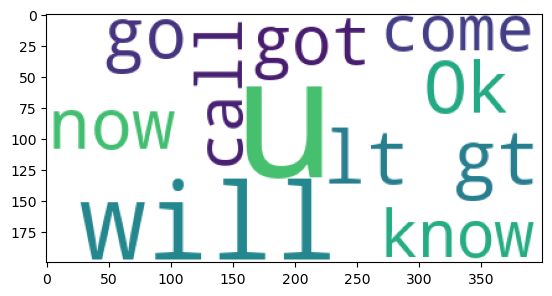

In [9]:
ham_plot = WordCloud(max_words=10,background_color='white').generate(ham)
plt.imshow(ham_plot)

### Spam

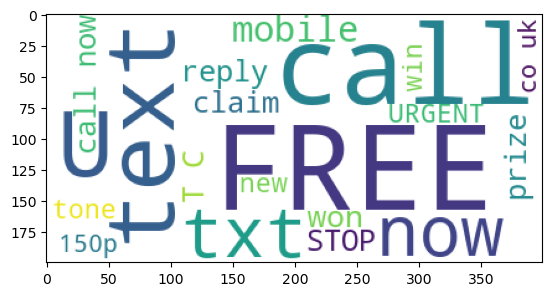

In [10]:
spam = ' '.join(df[df['Category'] == 'spam']['Message'].values)
spam_plot = WordCloud(min_font_size=10,max_words=20,background_color='white').generate(spam)
plt.imshow(spam_plot)

<Axes: xlabel='Category'>

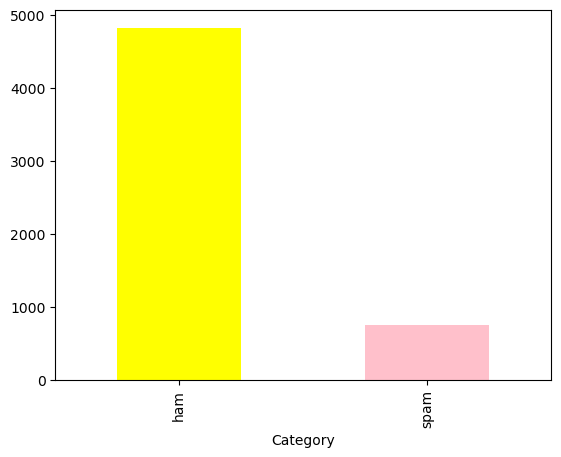

In [11]:
## How many spam and ham emails are present
df['Category'].value_counts().plot(kind='bar',color = ['yellow','pink'])

## Training the Machine

### Converting the categorical data into numerical data

#### Bag Of Words

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
bow = CountVectorizer(stop_words='english')

In [14]:
bow.fit(df['Message'])
x = bow.transform(df['Message']).toarray() #input
y = df['Category'] #output

#### Splitting the data into training data and test data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 22)

### Applying the ML Algorithms

In [17]:
from sklearn.metrics import accuracy_score

#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_test,y_pred)

#### Naive Bayes

In [18]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)
accuracy_score(y_test,y_pred)

0.9838565022421525

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
accuracy_score(y_test,y_pred)

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)
y_pred = log.predict(x_test)
accuracy_score(y_test,y_pred)

#### SVC

In [ ]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train,y_train)
y_pred = sv.predict(x_test)
accuracy_score(y_test,y_pred)

## Deployment

In [19]:
email = input("Enter the mail: ")
data = bow.transform([email]).toarray()
result = nb.predict(data)[0]
result

Enter the mail: hello how are you asnan


'ham'

## Pickling

In [20]:
import pickle
# from sklearn.pipeline import make_pipeline

In [21]:
pickle.dump(nb,open("nb.pkl","wb")) #write binary

In [22]:
# reading in streamlit
model = pickle.load(open("nb.pkl","rb")) #read binary
model

MultinomialNB()

In [23]:
bow_pkl = pickle.dump(bow,open("bow.pkl",'wb'))
bow_pkl1 = pickle.load(open("bow.pkl","rb"))
bow_pkl1

CountVectorizer(stop_words='english')

In [24]:
bow_pkl1.transform(['Hello, how are you? I am glad to see you.'])

<1x8440 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>